In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

systems = ['jabref','prom','team']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)
files = []
dfs = [] # Order: [jabref, prom , team]
df_total = None
for system in systems:
    files.append(config['file locations'][system]['preprocess comparisons'])
    tmp_df = pd.read_csv("../" + config['file locations'][system]['preprocess comparisons'])
    tmp_df['system'] = system
    dfs.append(tmp_df)
    
jabref_bow = dfs[0].loc[dfs[0]['Feature rep.'].isin(['Bag-of-words'])]
jabref_tfidf = dfs[0].loc[dfs[0]['Feature rep.'].isin(['TF-IDF'])]

prom_bow = dfs[1].loc[dfs[1]['Feature rep.'].isin(['Bag-of-words'])]
prom_tfidf = dfs[1].loc[dfs[1]['Feature rep.'].isin(['TF-IDF'])]

team_bow = dfs[2].loc[dfs[2]['Feature rep.'].isin(['Bag-of-words'])]
team_tfidf = dfs[2].loc[dfs[2]['Feature rep.'].isin(['TF-IDF'])]


In [3]:
df_temp = [dfs[0], dfs[1], dfs[2]]
df_all = pd.concat(df_temp)
tmp_all = df_all.copy()
tmp_all=tmp_all.drop(columns=['train_size','test_size', 'settings', 'report_table'])
df_all = df_all.drop(columns=['settings','report_table', 'train_size', 'test_size'])



indices = df_all[(df_all['setting_id'] == 's1')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's2')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's4')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's3')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's5')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's6')].index  
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's7')].index
df_all.drop(indices, inplace=True)

tmp_all = tmp_all.rename(columns={'macro_precision' : 'Macro precision',
                  'macro_recall' : 'Macro recall',
                  'weighted_precision' : 'Weighted precision',
                  'weighted_recall' : 'Weighted recall',
                  'macro_f1' : 'Macro f1-score',
                  'weighted_f1' : 'Weighted f1-score'})

# Table, Best setting
### Average of every setting_id, over subject systems, classifiers, feature method

In [4]:
# Look at the best setting
tmp = tmp_all.copy()
tmp=tmp.groupby(['setting_id']).mean()

tmp.sort_values(by=['accuracy'], ascending=False)

,accuracy,Macro precision,Macro recall,Weighted precision,Weighted recall,Macro f1-score,Weighted f1-score
setting_id,,,,,,,
s0,0.861959,0.768568,0.714153,0.867230,0.861959,0.720941,0.859042
s4,0.858227,0.763404,0.722055,0.868284,0.858227,0.724395,0.857370
s1,0.820218,0.704812,0.660823,0.824742,0.820218,0.661987,0.814003
s2,0.810431,0.686565,0.655594,0.819882,0.810431,0.650211,0.806859
s3,0.774093,0.687194,0.616027,0.781713,0.774093,0.623531,0.769628
s5,0.772887,0.694143,0.605114,0.785209,0.772887,0.614790,0.767953
s6,0.762595,0.625305,0.591659,0.766161,0.762595,0.596528,0.757287
s7,0.759661,0.658958,0.582767,0.765974,0.759661,0.587053,0.751184


# Table, Best Classifier
### Average of s0, over the subject systems with feature method Bag-of-Words

In [5]:
tmp = tmp_all.copy()

# remove tf-idf
indices = tmp[(tmp['Feature rep.'] == 'TF-IDF')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's1')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's2')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's3')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's4')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's5')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's6')].index  
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's7')].index
tmp.drop(indices, inplace=True)

tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s0'
tmp.sort_values(by=['accuracy'], ascending=False)

s0 = tmp.copy()

# The best setting, with best classifier over the three subject systems

In [6]:
tmp = tmp_all.copy()

# remove tf-idf
indices = tmp[(tmp['Feature rep.'] == 'TF-IDF')].index
tmp.drop(indices, inplace=True)

tmp = tmp[(tmp['setting_id'] == 's0')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s0'
tmp.sort_values(by=['accuracy'], ascending=False)
s0=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's1')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s1'
tmp.sort_values(by=['accuracy'], ascending=False)
s1=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's2')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s2'
tmp.sort_values(by=['accuracy'], ascending=False)
s2=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's3')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s3'
tmp.sort_values(by=['accuracy'], ascending=False)
s3=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's4')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s4'
tmp.sort_values(by=['accuracy'], ascending=False)
s4=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's5')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s5'
tmp.sort_values(by=['accuracy'], ascending=False)
s5=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's6')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s6'
tmp.sort_values(by=['accuracy'], ascending=False)
s6=tmp.head(1)

tmp = tmp_all.copy()
tmp = tmp[(tmp['setting_id'] == 's7')]
tmp=tmp.groupby(['classifier']).mean()
tmp.reset_index(inplace=True)
tmp['Setting Id']='s7'
tmp.sort_values(by=['accuracy'], ascending=False)
s7=tmp.head(1)

best_pre = pd.concat([s0,s1,s2,s3,s4,s5,s6,s7], ignore_index=True)
best_pre.set_index('Setting Id')
best_pre.sort_values(by='accuracy', ascending=False)

,classifier,accuracy,Macro precision,Macro recall,Weighted precision,Weighted recall,Macro f1-score,Weighted f1-score,Setting Id
0,MaxEnt,0.875242,0.719305,0.730684,0.881613,0.875242,0.718363,0.874486,s0
4,MaxEnt,0.866303,0.774065,0.742483,0.876095,0.866303,0.735946,0.866718,s4
1,MaxEnt,0.830054,0.691327,0.675986,0.839886,0.830054,0.667614,0.826175,s1
2,MaxEnt,0.823977,0.688709,0.692693,0.842247,0.823977,0.673687,0.827038,s2
3,MaxEnt,0.782340,0.710539,0.635699,0.793273,0.782340,0.642275,0.780000,s3
5,MaxEnt,0.781434,0.700411,0.604472,0.792373,0.781434,0.619908,0.777415,s5
6,MaxEnt,0.768589,0.631412,0.600405,0.772144,0.768589,0.605268,0.765502,s6
7,MaxEnt,0.765041,0.643931,0.581030,0.767751,0.765041,0.584697,0.756834,s7


In [7]:

res = df_all.sort_values(by='accuracy',ascending=[False])

# take the mean values of every setting for each Feature representation
jab_df_frep_mean =res[res['system']=='jabref'].groupby(['Feature rep.']).mean()
prom_df_frep_mean = res[res['system']=='prom'].groupby(['Feature rep.']).mean()
team_df_frep_mean = res[res['system']=='team'].groupby(['Feature rep.']).mean()

In [8]:
jab_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.904255,0.684079,0.707819,0.910656,0.904255,0.691240,0.905337
TF-IDF,0.874557,0.822106,0.662650,0.879651,0.874557,0.681997,0.871913


In [9]:
prom_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.810149,0.736159,0.706459,0.814087,0.810149,0.709285,0.803821
TF-IDF,0.827209,0.812895,0.746500,0.835444,0.827209,0.758542,0.823364


In [10]:
team_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.886001,0.777244,0.725211,0.891818,0.886001,0.734815,0.883290
TF-IDF,0.869585,0.778923,0.736277,0.871726,0.869585,0.749769,0.866525


In [11]:
jab_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)
prom_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)
team_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)

j_rep = jab_df_frep_mean.rename(columns={'accuracy' : 'value'})
j_rep.reset_index(inplace=True)
j_rep['metric'] = 'accuracy'
j_rep['system'] = 'JabRef'
                      
p_rep = prom_df_frep_mean.rename(columns={'accuracy' : 'value'})
p_rep.reset_index(inplace=True)
p_rep['metric'] = 'accuracy'  
p_rep['system'] = 'ProM'
                      
m_rep = team_df_frep_mean.rename(columns={'accuracy' : 'value'})
m_rep.reset_index(inplace=True)
m_rep['metric'] = 'accuracy'
m_rep['system'] = 'TeamMates'

In [12]:
# Feature Representation barplot
df_vis_rep = pd.concat([j_rep, p_rep, m_rep], ignore_index = True)
df_vis_rep

,Feature rep.,value,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1,metric,system
0,Bag-of-words,0.904255,0.684079,0.707819,0.910656,0.904255,0.691240,0.905337,accuracy,JabRef
1,TF-IDF,0.874557,0.822106,0.662650,0.879651,0.874557,0.681997,0.871913,accuracy,JabRef
2,Bag-of-words,0.810149,0.736159,0.706459,0.814087,0.810149,0.709285,0.803821,accuracy,ProM
3,TF-IDF,0.827209,0.812895,0.746500,0.835444,0.827209,0.758542,0.823364,accuracy,ProM
4,Bag-of-words,0.886001,0.777244,0.725211,0.891818,0.886001,0.734815,0.883290,accuracy,TeamMates
5,TF-IDF,0.869585,0.778923,0.736277,0.871726,0.869585,0.749769,0.866525,accuracy,TeamMates


# BarPlot, Feature method performance, with best setting s0
### Average of accuracy over subject systems and classifiers

<Figure size 360x360 with 0 Axes>

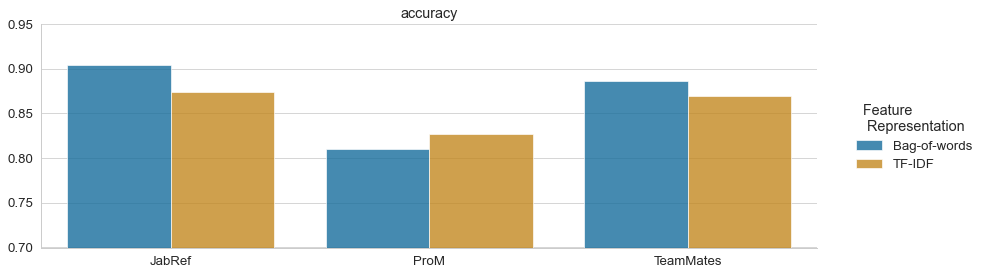

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis_rep,
                kind="bar",
                x="system",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="Feature rep.",
                col="metric",
                height=4.0,
                aspect=3,
                margin_titles=True)
g.set(ylim=(0.7, 0.95))
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}") #, row_template="{row_name}")
g.legend.set_title("Feature \n Representation")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#g.fig.suptitle('Subject system: Jabref')

# Following plots, show pre-process settings for every subject system with bag-of-words


In [14]:
jabref_bow = jabref_bow.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: JabRef')

<Figure size 360x360 with 0 Axes>

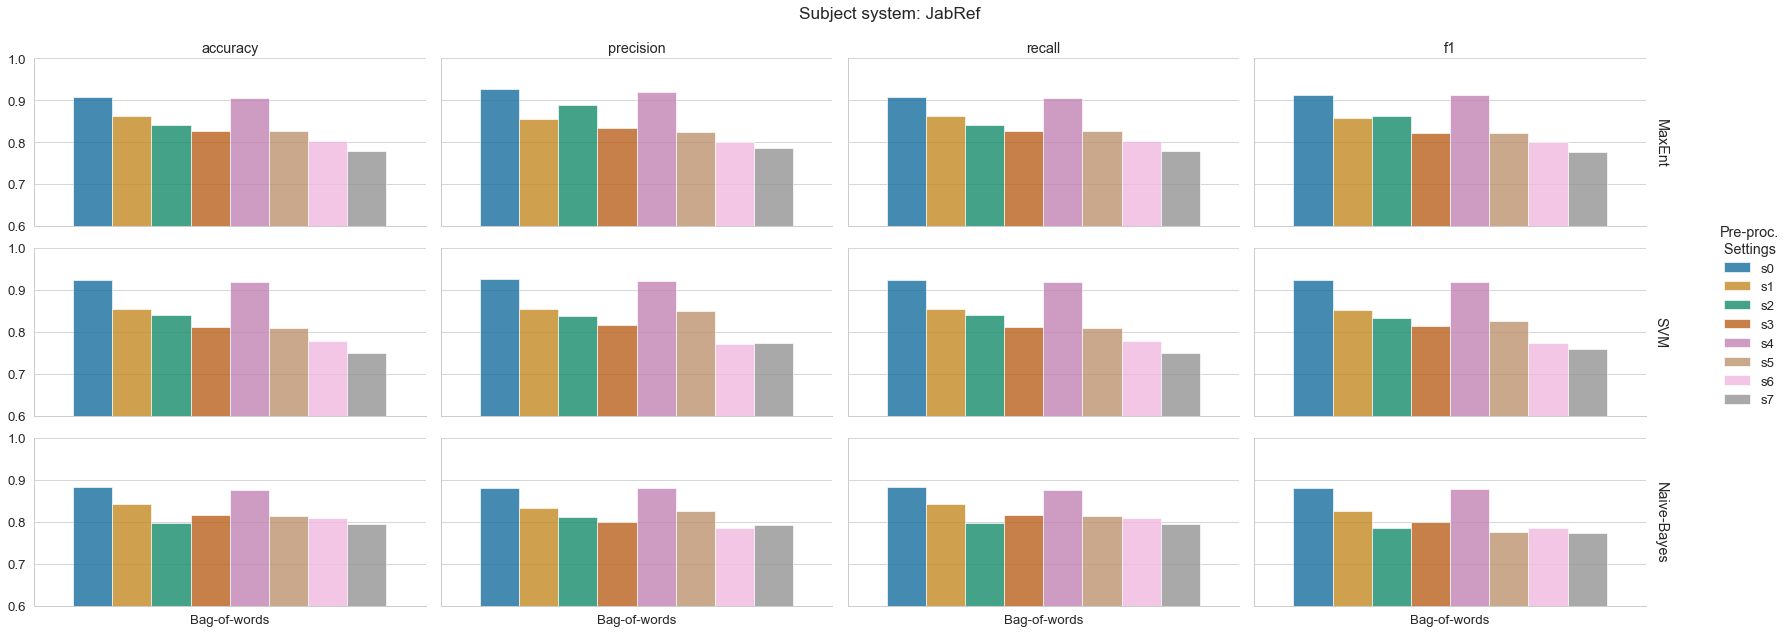

In [15]:
df_vis1 = pd.concat([j_acc,j_prc, j_recall, j_f1], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)

sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: JabRef')

#for p in g.fig.ax.patches:
#    _x = (p.get_x() + p.get_width())/2
#    _y = p.get_y() + p.get_height()
#    value = int(p.get_width())
#    ax.text(_x, _y, value, ha="left")

#axes = []
#for x in range(3):
#    for y in range(3):
#        axes.append(g.facet_axis(x,y))
        
#for ax in axes:
#    for p in ax.patches:
#        ax.text(p.get_x(), 
#                p.get_height() * 1.02, 
#               '{0:.1f}'.format(93.8),
#                color='black', 
#                rotation='horizontal', 
#                size='medium')


In [16]:
prom_bow = prom_bow.drop(labels={'settings'}, axis=1)
prom_bow = prom_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: ProM')

<Figure size 360x360 with 0 Axes>

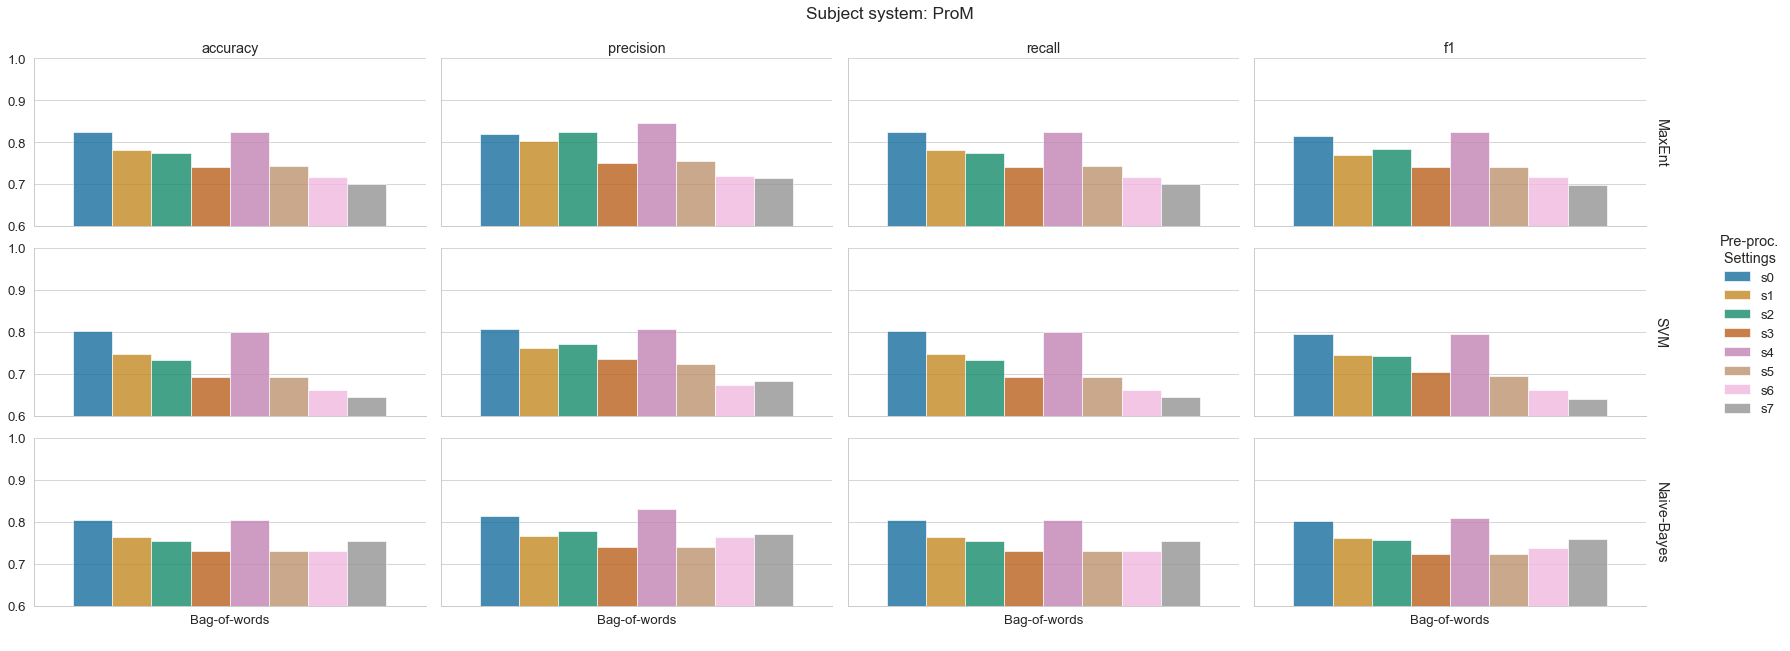

In [17]:
df_vis = pd.concat([p_acc,p_prc, p_recall, p_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: ProM')

In [18]:
team_bow = team_bow.drop(labels={'settings'}, axis=1)
team_bow = team_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'



Text(0.5, 0.98, 'Subject system: TeamMates')

<Figure size 360x360 with 0 Axes>

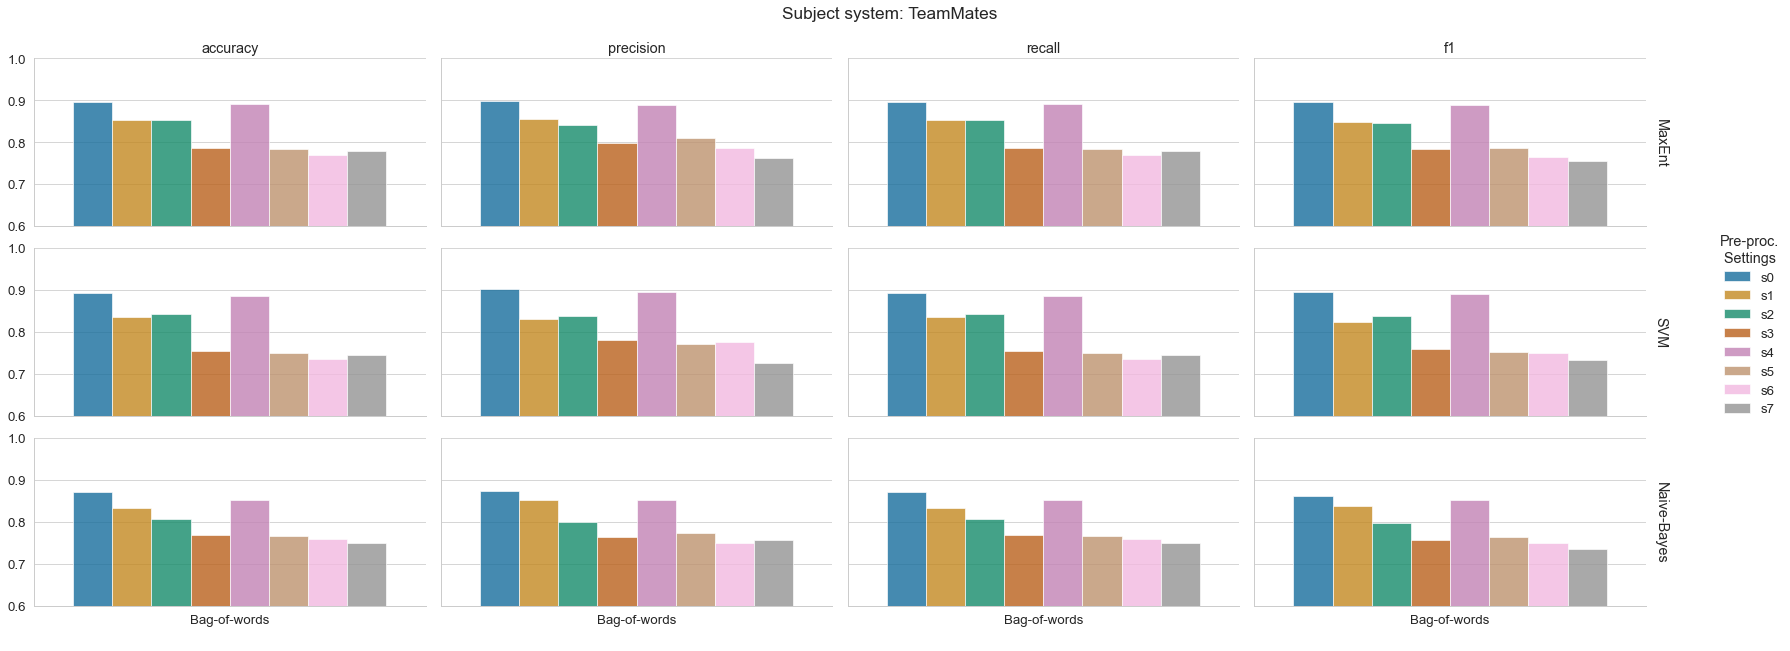

In [19]:

df_vis = pd.concat([t_acc,t_prc, t_recall, t_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: TeamMates')

# TF-IDF

In [20]:
jabref_bow = jabref_tfidf.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: Jabref')

<Figure size 360x360 with 0 Axes>

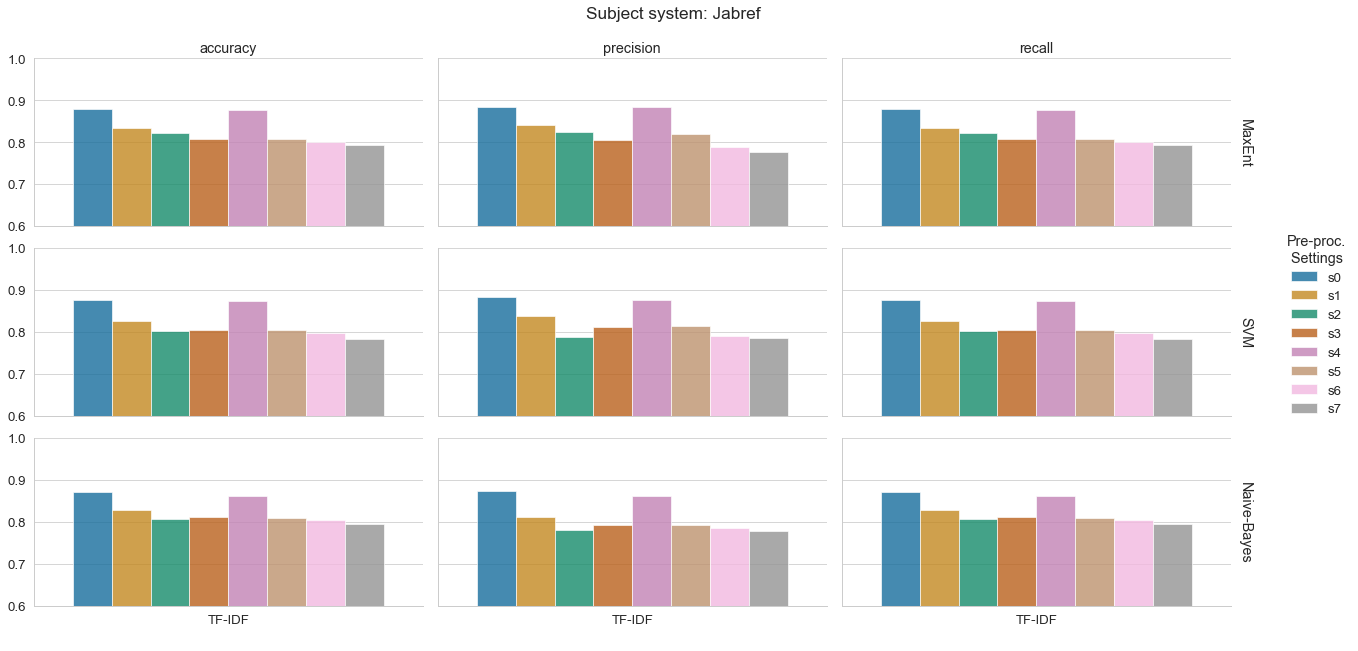

In [21]:
df_vis1 = pd.concat([j_acc,j_prc, j_recall], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

In [22]:
prom_bow = prom_tfidf.drop(labels={'settings'}, axis=1)
prom_bow = prom_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: Prom')

<Figure size 360x360 with 0 Axes>

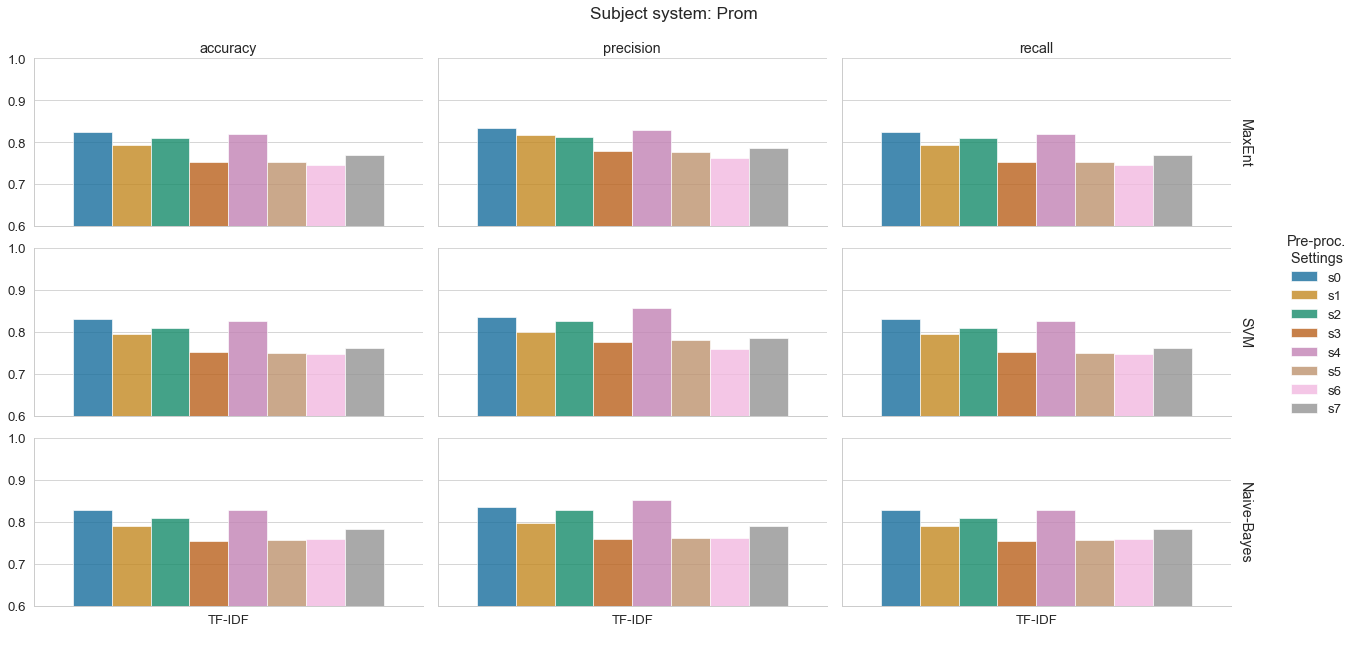

In [23]:
df_vis = pd.concat([p_acc,p_prc, p_recall], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

In [24]:
team_bow = team_tfidf.drop(labels={'settings'}, axis=1)
team_bow = team_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: teammates')

<Figure size 360x360 with 0 Axes>

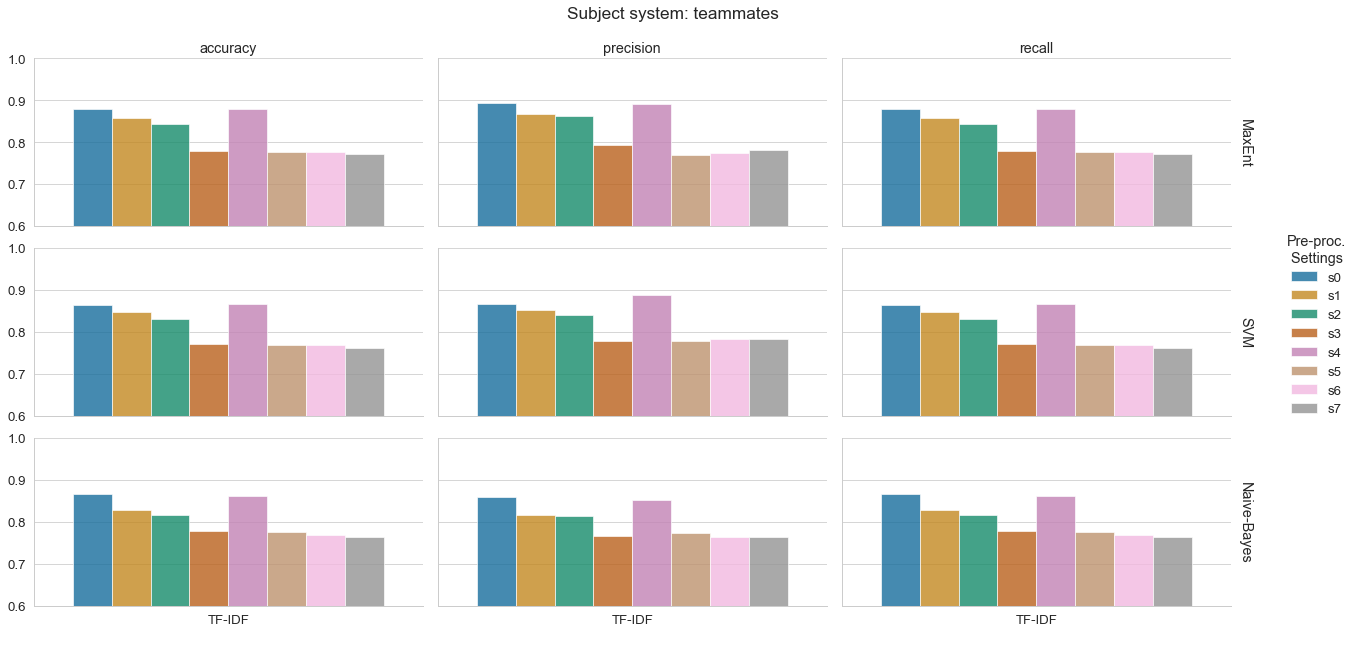

In [25]:
df_vis = pd.concat([t_acc,t_prc, t_recall,], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')

In [26]:
df = df_all
indices = df[(df['Feature rep.'] == 'TF-IDF')].index
df.drop(indices, inplace=True)
df=df.groupby(['classifier']).mean()
df.sort_values(by=['accuracy'], ascending=False)


,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
classifier,,,,,,,
MaxEnt,0.875242,0.719305,0.730684,0.881613,0.875242,0.718363,0.874486
SVM,0.872213,0.721552,0.706455,0.879116,0.872213,0.705425,0.870857
Naive-Bayes,0.852950,0.756625,0.702350,0.855833,0.852950,0.711552,0.847106


# Average over the subject systems, for ratio

In [27]:
systems = ['jabref','prom','team']
size_type = 'ratio'
df_list = []

from pathlib import Path


for system in systems:
    fn = 'size_' + size_type + '_' + system + '.csv'
    fp = Path.cwd().parent/'Data'/system/fn
    tmp = pd.read_csv(fp)
    df_list.append(tmp)

df_sizes = pd.concat([df_list[0],df_list[1],df_list[2]])

df_sizes_ratio = df_sizes.copy()

In [28]:
maxEnt_df = df_sizes[df_sizes['classifier']=='maxEnt']
svm_df = df_sizes[df_sizes['classifier']=='svm']
naive_df = df_sizes[df_sizes['classifier']=='naive']


maxEnt_avg = maxEnt_df.groupby('size').mean()
maxEnt_avg.reset_index(inplace=True)

svm_avg = svm_df.groupby('size').mean()
svm_avg.reset_index(inplace=True)

naive_avg = naive_df.groupby('size').mean()
naive_avg.reset_index(inplace=True)


train_size = ['10', '15', '20', '25']


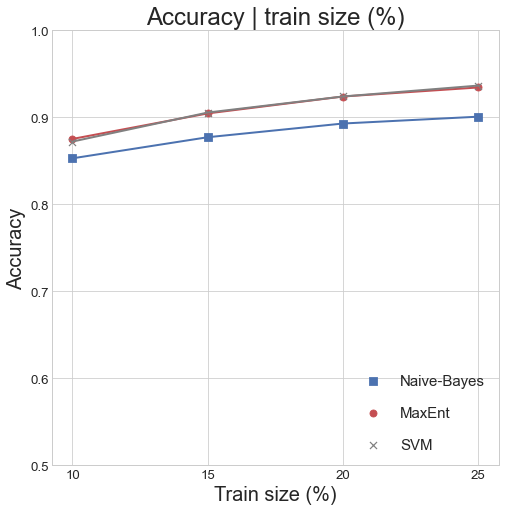

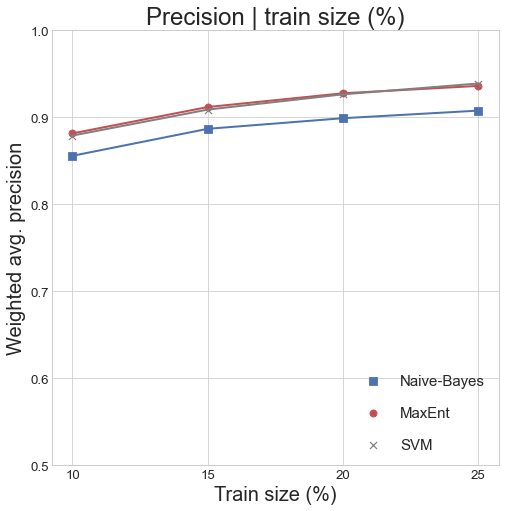

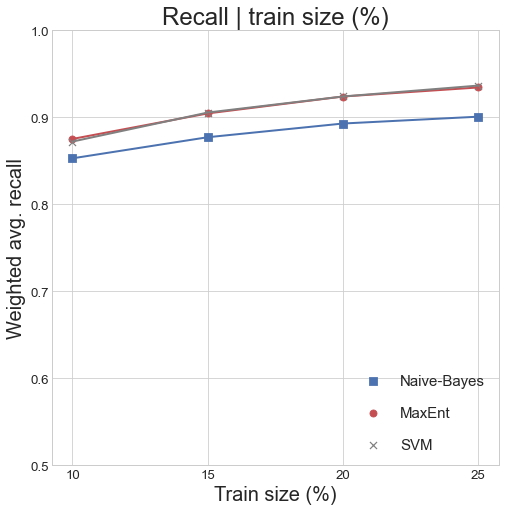

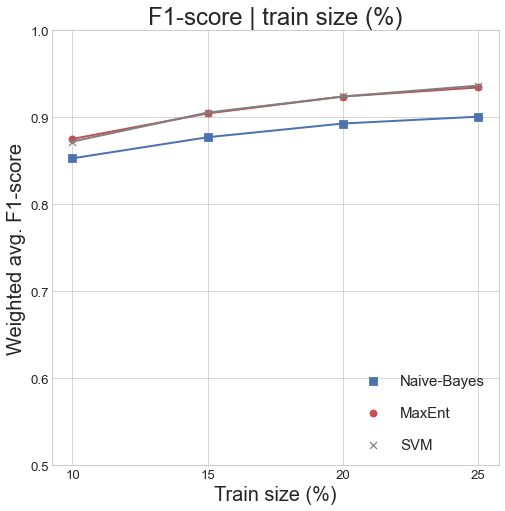

In [29]:
#########ACCURACY#############################
plt.style.use("seaborn-whitegrid")
Graphs.plot_line_graph("Accuracy | train size (%)", train_size,{
                                                            'naive': naive_avg['accuracy'],
                                                            'maxEnt': maxEnt_avg['accuracy'],
                                                            'svm': svm_avg['accuracy']
                                                            }, "Train size (%)", "Accuracy", type ="accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Precision | train size (%)", train_size, {
                                                            'naive': naive_avg['precision'],
                                                            'maxEnt': maxEnt_avg['precision'],
                                                            'svm': svm_avg['precision']
                                                            }, "Train size (%)", "Weighted avg. precision", type = "accuracy")

##############RECALL#######################
Graphs.plot_line_graph("Recall | train size (%)", train_size, {'naive': naive_avg['recall'],
                                                             'maxEnt': maxEnt_avg['recall'],
                                                             'svm': svm_avg['recall']
                                                            }, "Train size (%)", "Weighted avg. recall", type = "accuracy")

Graphs.plot_line_graph("F1-score | train size (%)", train_size, {'naive': naive_avg['f1'],
                                                             'maxEnt': maxEnt_avg['f1'],
                                                             'svm': svm_avg['f1']
                                                            }, "Train size (%)", "Weighted avg. F1-score", type = "accuracy")


# Average over the subject systems, for abs

In [30]:
systems = ['jabref','prom','team']
size_type = 'abs'
df_list = []

from pathlib import Path


for system in systems:
    fn = 'size_' + size_type + '_' + system + '.csv'
    fp = Path.cwd().parent/'Data'/system/fn
    tmp = pd.read_csv(fp)
    df_list.append(tmp)

df_sizes = pd.concat([df_list[0],df_list[1],df_list[2]])

df_sizes_abs = df_sizes.copy()

In [31]:
maxEnt_df = df_sizes[df_sizes['classifier']=='maxEnt']
svm_df = df_sizes[df_sizes['classifier']=='svm']
naive_df = df_sizes[df_sizes['classifier']=='naive']


maxEnt_avg = maxEnt_df.groupby('size').mean()
maxEnt_avg.reset_index(inplace=True)

svm_avg = svm_df.groupby('size').mean()
svm_avg.reset_index(inplace=True)

naive_avg = naive_df.groupby('size').mean()
naive_avg.reset_index(inplace=True)


train_size = ['5', '10', '15', '20', '25']

maxEnt_avg
svm_avg
naive_avg

,size,accuracy,precision,recall,f1
0,5,0.652716,0.823449,0.652716,0.652716
1,10,0.805803,0.850061,0.805803,0.805803
2,15,0.842418,0.886634,0.842418,0.842418
3,20,0.859234,0.896149,0.859234,0.859234
4,25,0.886466,0.914852,0.886466,0.886466


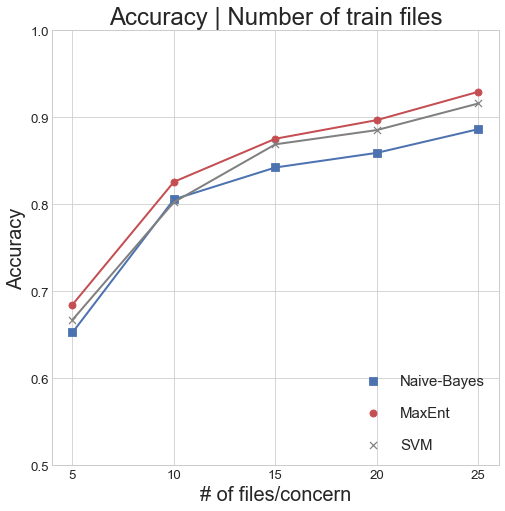

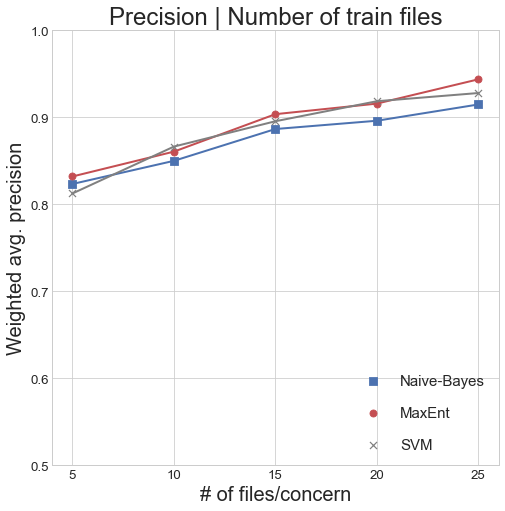

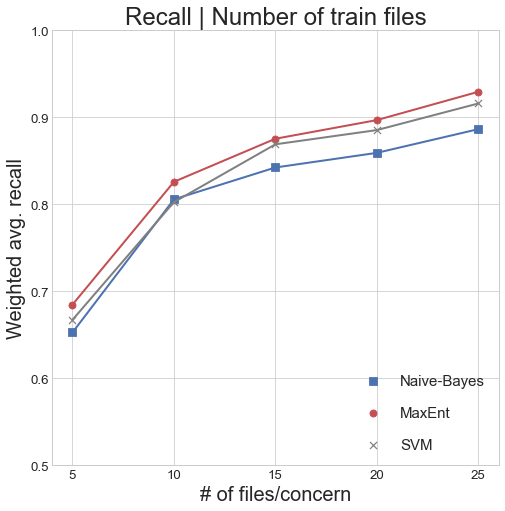

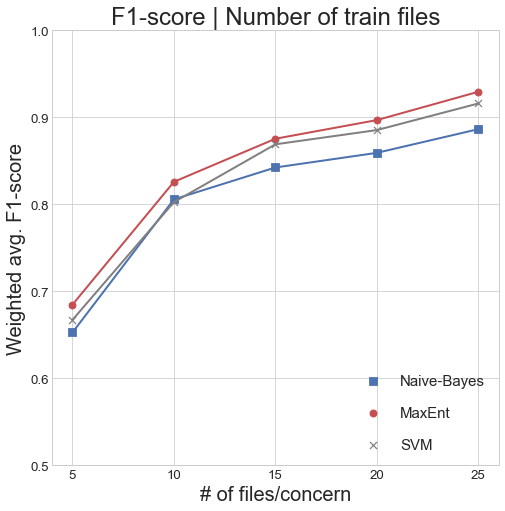

In [32]:


#########ACCURACY#############################

Graphs.plot_line_graph("Accuracy | Number of train files", train_size,{
                                                            'naive': naive_avg['accuracy'],
                                                            'maxEnt': maxEnt_avg['accuracy'],
                                                            'svm': svm_avg['accuracy']
                                                            }, "# of files/concern", "Accuracy", type ="accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Precision | Number of train files", train_size, {
                                                            'naive': naive_avg['precision'],
                                                            'maxEnt': maxEnt_avg['precision'],
                                                            'svm': svm_avg['precision']
                                                            }, "# of files/concern", "Weighted avg. precision", type = "accuracy")

##############RECALL#######################
Graphs.plot_line_graph("Recall | Number of train files", train_size, {'naive': naive_avg['recall'],
                                                             'maxEnt': maxEnt_avg['recall'],
                                                             'svm': svm_avg['recall']
                                                            }, "# of files/concern", "Weighted avg. recall", type = "accuracy")

Graphs.plot_line_graph("F1-score | Number of train files", train_size, {'naive': naive_avg['f1'],
                                                             'maxEnt': maxEnt_avg['f1'],
                                                             'svm': svm_avg['f1']
                                                            }, "# of files/concern", "Weighted avg. F1-score", type = "accuracy")


In [33]:
tot_size_df = pd.concat([df_sizes_abs, df_sizes_ratio])
tot_size_df

,accuracy,precision,recall,f1,size,classifier,system,size type
0,0.640491,0.883943,0.640491,0.640491,5,maxEnt,jabref,abs
1,0.821159,0.867112,0.821159,0.821159,10,maxEnt,jabref,abs
2,0.858793,0.895404,0.858793,0.858793,15,maxEnt,jabref,abs
3,0.878272,0.907138,0.878272,0.878272,20,maxEnt,jabref,abs
4,0.898531,0.929604,0.898531,0.898531,25,maxEnt,jabref,abs
...,...,...,...,...,...,...,...,...
7,0.916256,0.919991,0.916256,0.916256,25%,naive,team,ratio
8,0.891929,0.902759,0.891929,0.891929,10%,svm,team,ratio
9,0.917511,0.918212,0.917511,0.917511,15%,svm,team,ratio
10,0.933846,0.931362,0.933846,0.933846,20%,svm,team,ratio
